# Using our own functions

In [1]:
def e_from_porosity(n):
    '''
    Calculate void ratio from porosity
    '''
    e = n / (1 - n)
    return e

def porosity_from_e(e):
    '''
    Calculate porosity from void ratio
    '''
    n = e / (1 + e)
    return n

def gamma_d_from_gamma_s(gamma_s, e):
    '''
    Calculate dry unit weight from unit weight of solids and void ratio
    '''
    gamma_d = gamma_s / (1 + e)
    return gamma_d

def gamma_from_e(e, gamma_s, w):
    '''
    Calculate unit weight from void ratio,
    unit weight of solids, and water content
    '''
    gamma = gamma_s * (1 + w) / (1 + e)
    return gamma

def e_from_gamma_s(gamma_s,w,S_r,gamma_w):
    '''
    Calculate void ratio from unit weight of solids,
    water content, saturation, and unit weight of water
    '''
    e = (w * gamma_s) / (S_r * gamma_w)
    return e

def porosity_from_gamma(gamma, gamma_s, w):
    '''
    Calculate porosity from unit weight,
    unit weight of solids, and water content
    '''
    n = 1 - (gamma / (gamma_s * (1 + w)))
    return n

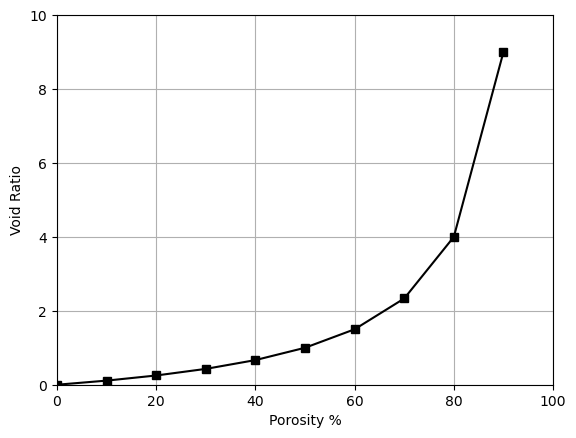

In [2]:
# make a plot of porosity versus void ratio
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 1, 0.1)
e = e_from_porosity(n)

plt.plot(n*100, e, 'ks-')
plt.xlabel('Porosity %')
plt.ylabel('Void Ratio')
plt.axis([0, 100, 0, 10])
plt.grid(True)

plt.show()

In [3]:
# Solve this problem:
# Given w = 30%, gamma_s = 28 kN/m^3, S_r = 100%
# Calculate void ratio, gamma, and porosity

# Given values
w = 0.3
gamma_s = 28
S_r = 1
gamma_w = 9.81 # unit weight of water in kN/m^3

# Calculate void ratio
e = e_from_gamma_s(gamma_s, w, S_r, gamma_w)
print(f'Void ratio = {e:.2f}')

# Calculate unit weight
gamma = gamma_from_e(e, gamma_s, w)
print(f'Unit weight = {gamma:.2f} kN/m^3')

# Calculate porosity
n = porosity_from_gamma(gamma, gamma_s, w)
print(f'Porosity = {n*100:.2f}%')

Void ratio = 0.86
Unit weight = 19.61 kN/m^3
Porosity = 46.13%


In [4]:
# Solve this problem:
# Sand with large water content, low gamma and high gamma_s: 
# w = 35%, gamma = 19 kN/m^3, gamma_s = 28.5 kN/m^3
# Calculate porosity, void ratio, and dry unit weight

# Given values
w = 0.35
gamma = 19
gamma_s = 28.5

# Calculate porosity
n = porosity_from_gamma(gamma, gamma_s, w)
print(f'Porosity = {n*100:.2f}%')

# Calculate void ratio
e = e_from_porosity(n)
print(f'Void ratio = {e:.2f}')

# Calculate dry unit weight
gamma_d = gamma_d_from_gamma_s(gamma_s, e)
print(f'Dry unit weight = {gamma_d:.2f} kN/m^3')

Porosity = 50.62%
Void ratio = 1.03
Dry unit weight = 14.07 kN/m^3


In [5]:
# Solve this problem:
# Sand with low water content, high gamma, and low gamma_s: 
# w = 18%, gamma = 21 kN/m^3, gamma_s = 26.5 kN/m^3
# Calculate porosity, void ratio, and dry unit weight

# Given values
w = 0.18
gamma = 21
gamma_s = 26.5

# Calculate porosity
n = porosity_from_gamma(gamma, gamma_s, w)
print(f'Porosity = {n*100:.2f}%')

# Calculate void ratio
e = e_from_porosity(n)
print(f'Void ratio = {e:.2f}')

# Calculate dry unit weight
gamma_d = gamma_d_from_gamma_s(gamma_s, e)
print(f'Dry unit weight = {gamma_d:.2f} kN/m^3')

Porosity = 32.84%
Void ratio = 0.49
Dry unit weight = 17.80 kN/m^3


# Using Groundhog

Groundhog is available [here](https://github.com/snakesonabrain/groundhog).

Solve the problem in [this link](https://hackernoon.com/using-python-in-geotechnical-engineering):

In [ ]:
# Run this cell if you have not installed Groundhog
import sys
!{sys.executable} -m pip install groundhog

In [6]:
# Import phaserelations module
from groundhog.siteinvestigation.classification import phaserelations

In [7]:
# Define variables

# saturation (S)
S = 1.0

# weight of sample and container in Newton (N)
w_s_c = 6.0

# weight of dry sample and container in Newton (N)
w_ds_c = 5.0

# weight of container in Newton (N)
w_c = 1.0

# specific gravity of soil solids (Gs)
Gs = 2.7

# unit weight of water in kN/m^3
gamma_w = 9.81

In [8]:
# calculate the weight of water in Newton (N)
w_w = w_s_c - w_ds_c

# calculate the weight of solids in Newton (N)
w_s = w_ds_c - w_c

# calculate the water content (w)
w = w_w / w_s

# calculate the voild ratio (e) using the function
# voidratio_watercontent(w, S, Gs)
phaserelations.voidratio_watercontent(w, S, Gs)

{'Void ratio [-]': 0.675}

In [9]:
# extract the void ratio (e) from the function's output
# which is a dictionary with the key 'Void ratio [-]'
e = phaserelations.voidratio_watercontent(w, S, Gs)['Void ratio [-]']
print(f'The void ratio is {e:.4f}')

The void ratio is 0.6750


In [10]:
# compute the bulk unit weight and effective unit weight
# using the function bulkunitweight(S, e, Gs, gamma_w)
phaserelations.bulkunitweight(S, e, Gs, gamma_w)

{'bulk unit weight [kN/m3]': 19.76641791044776,
 'effective unit weight [kN/m3]': 9.95641791044776}

In [11]:
# extract the bulk unit weight and effective unit weight 
# from the function's output which is a dictionary with the keys
# 'bulk unit weight [kN/m3]' and 'effective unit weight [kN/m3]'
dict = phaserelations.bulkunitweight(S, e, Gs, gamma_w)
gamma_b = dict['bulk unit weight [kN/m3]']
gamma_e = dict['effective unit weight [kN/m3]']
print(f'The bulk unit weight is {gamma_b:.4f} kN/m3')
print(f'The effective unit weight is {gamma_e:.4f} kN/m3')

The bulk unit weight is 19.7664 kN/m3
The effective unit weight is 9.9564 kN/m3


In [12]:
# compute the dry unit weight using the function
# dryunitweight_watercontent(w, gamma_b)
phaserelations.dryunitweight_watercontent(w, gamma_b)

{'dry unit weight [kN/m3]': 15.813134328358208}

In [13]:
# extract the dry unit weight from the function's output
# which is a dictionary with the key 'dry unit weight [kN/m3]'
gamma_d = phaserelations.dryunitweight_watercontent(w, gamma_b)['dry unit weight [kN/m3]']
print(f'The dry unit weight is {gamma_d:.4f} kN/m3')

The dry unit weight is 15.8131 kN/m3
